In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=6, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.18.1
pandas 0.25.3
sklearn 0.21.3
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


## 数据读取

In [3]:
# 判断文件存在
train_dir = '/kaggle/input/10-monkey-species/training/training'
valid_dir = '/kaggle/input/10-monkey-species/validation/validation'
label_file = '/kaggle/input/10-monkey-species/monkey_labels.txt'
print(os.path.exists(train_dir))
print(os.path.exists(valid_dir))
print(os.path.exists(label_file))

print(os.listdir(train_dir))
print(os.listdir(valid_dir))

True
True
True
['n4', 'n3', 'n9', 'n6', 'n5', 'n1', 'n7', 'n2', 'n0', 'n8']
['n4', 'n3', 'n9', 'n6', 'n5', 'n1', 'n7', 'n2', 'n0', 'n8']


In [4]:
# 读取labels
labels = pd.read_csv(label_file, header=0)
print(labels)

   Label     Latin Name              Common Name                     \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

    Train Images    Validation Images  
0             131                  26  
1             139                  28  
2             137                  27  
3             152                  30  
4             131 

In [5]:
# 将图片转化成同一尺寸
height = 128
width = 128
channels = 3
batch_size = 64
num_classes = 10

# 读取图片并增强
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255, # 缩放到0-1之间
    rotation_range= 40, # 旋转范围
    width_shift_range= 0.2, # 水平位移
    height_shift_range= 0.2, # 竖直平移
    shear_range= 0.2, # 剪切范围
    zoom_range= 0.2, # 缩放范围
    horizontal_flip= True, # 随机水平翻转
    fill_mode= 'nearest', # 对空白位置的填充规则
)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size = (height, width), batch_size = batch_size, seed = 7, shuffle = True, class_mode = 'categorical')

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255, # 缩放到0-1之间
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size = (height, width), batch_size = batch_size, seed = 7, shuffle = False, class_mode = 'categorical')

train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num, valid_num)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098 272


In [6]:
for i in range(2):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(64, 128, 128, 3) (64, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.

## 模型构建

In [7]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[width, height, channels]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       7

In [8]:
epochs = 100
history = model.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=valid_generator,
                              validation_steps= valid_num // batch_size)

Train for 17 steps, validate for 4 steps
Epoch 1/100
17/17 [==============================] - 43s 3s/step - loss: 2.3125 - accuracy: 0.0919 - val_loss: 2.3020 - val_accuracy: 0.1367
Epoch 2/100
17/17 [==============================] - 37s 2s/step - loss: 2.3020 - accuracy: 0.1112 - val_loss: 2.2980 - val_accuracy: 0.1172
Epoch 3/100
17/17 [==============================] - 37s 2s/step - loss: 2.2865 - accuracy: 0.1315 - val_loss: 2.2103 - val_accuracy: 0.1406
Epoch 4/100
17/17 [==============================] - 36s 2s/step - loss: 2.2137 - accuracy: 0.1896 - val_loss: 2.0473 - val_accuracy: 0.2539
Epoch 5/100
17/17 [==============================] - 37s 2s/step - loss: 2.0856 - accuracy: 0.2456 - val_loss: 1.9353 - val_accuracy: 0.3047
Epoch 6/100
17/17 [==============================] - 37s 2s/step - loss: 2.1400 - accuracy: 0.2060 - val_loss: 1.9866 - val_accuracy: 0.2852
Epoch 7/100
17/17 [==============================] - 37s 2s/step - loss: 1.9875 - accuracy: 0.2650 - val_loss: 1.

In [9]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


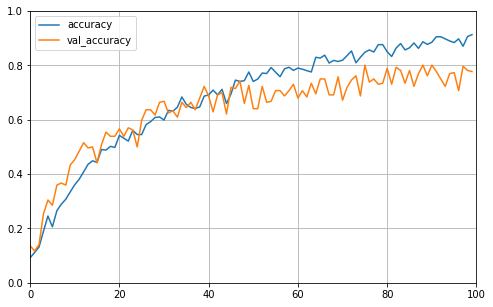

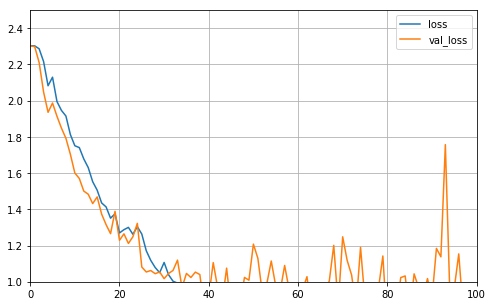

In [10]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()
    
plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 1, 2.5)

## 迁移学习--RestNet50 finetune

In [11]:
# 将图片转化成同一尺寸
height = 224
width = 224
channels = 3
batch_size = 24
num_classes = 10

# 读取图片并增强
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=keras.applications.resnet50.preprocess_input,
    rotation_range= 40, # 旋转范围
    width_shift_range= 0.2, # 水平位移
    height_shift_range= 0.2, # 竖直平移
    shear_range= 0.2, # 剪切范围
    zoom_range= 0.2, # 缩放范围
    horizontal_flip= True, # 随机水平翻转
    fill_mode= 'nearest', # 对空白位置的填充规则
)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size = (height, width), batch_size = batch_size, seed = 7, shuffle = True, class_mode = 'categorical')

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=keras.applications.resnet50.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size = (height, width), batch_size = batch_size, seed = 7, shuffle = False, class_mode = 'categorical')

train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num, valid_num)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098 272


In [12]:
for i in range(1):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(24, 224, 224, 3) (24, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [13]:
resnet50_fine_tune = keras.models.Sequential()
resnet50_fine_tune.add(keras.applications.ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))
resnet50_fine_tune.add(keras.layers.Dense(num_classes, activation='softmax'))
resnet50_fine_tune.layers[0].trainable = False

resnet50_fine_tune.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
resnet50_fine_tune.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
epochs = 10
history_resnet = resnet50_fine_tune.fit_generator(train_generator,
                                                  steps_per_epoch= train_num // batch_size,
                                                  epochs=epochs,
                                                  validation_data=valid_generator,
                                                  validation_steps= valid_num // batch_size)

Train for 45 steps, validate for 11 steps
Epoch 1/10
45/45 [==============================] - 50s 1s/step - loss: 1.5003 - accuracy: 0.5391 - val_loss: 0.7293 - val_accuracy: 0.7500
Epoch 2/10
45/45 [==============================] - 45s 1s/step - loss: 0.6995 - accuracy: 0.8585 - val_loss: 0.4224 - val_accuracy: 0.8523
Epoch 3/10
45/45 [==============================] - 45s 1s/step - loss: 0.4673 - accuracy: 0.9134 - val_loss: 0.3553 - val_accuracy: 0.9053
Epoch 4/10
45/45 [==============================] - 45s 995ms/step - loss: 0.3525 - accuracy: 0.9358 - val_loss: 0.3139 - val_accuracy: 0.9091
Epoch 5/10
45/45 [==============================] - 45s 1s/step - loss: 0.3100 - accuracy: 0.9423 - val_loss: 0.2693 - val_accuracy: 0.9356
Epoch 6/10
45/45 [==============================] - 45s 1s/step - loss: 0.2460 - accuracy: 0.9572 - val_loss: 0.2603 - val_accuracy: 0.9129
Epoch 7/10
45/45 [==============================] - 45s 1s/step - loss: 0.2226 - accuracy: 0.9646 - val_loss: 0.262

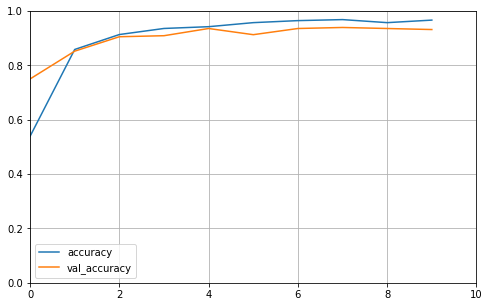

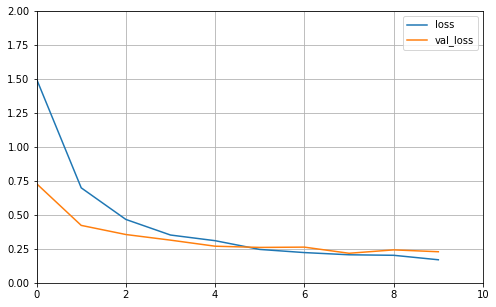

In [15]:
plot_learning_curves(history_resnet, 'accuracy', epochs, 0, 1)
plot_learning_curves(history_resnet, 'loss', epochs, 0, 2)

## 另一种resnet50 finetune，对resnet最后几层进行训练

In [16]:
resnet50 = keras.applications.ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet')
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [17]:
for layer in resnet50.layers[0:-5]:
    layer.trainable = False

resnet50_new = keras.models.Sequential([
    resnet50,
    keras.layers.Dense(num_classes, activation='softmax')
])

resnet50_new.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
resnet50_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 1,075,210
Non-trainable params: 22,532,992
_________________________________________________________________


In [18]:
epochs = 10
history_resnet_new = resnet50_new.fit_generator(train_generator,
                                                steps_per_epoch= train_num // batch_size,
                                                epochs=epochs,
                                                validation_data=valid_generator,
                                                validation_steps= valid_num // batch_size)

Train for 45 steps, validate for 11 steps
Epoch 1/10
45/45 [==============================] - 49s 1s/step - loss: 1.3570 - accuracy: 0.6294 - val_loss: 0.4814 - val_accuracy: 0.8750
Epoch 2/10
45/45 [==============================] - 45s 1s/step - loss: 0.5015 - accuracy: 0.9134 - val_loss: 0.2469 - val_accuracy: 0.9432
Epoch 3/10
45/45 [==============================] - 45s 997ms/step - loss: 0.3399 - accuracy: 0.9315 - val_loss: 0.2079 - val_accuracy: 0.9470
Epoch 4/10
45/45 [==============================] - 46s 1s/step - loss: 0.2644 - accuracy: 0.9497 - val_loss: 0.2188 - val_accuracy: 0.9318
Epoch 5/10
45/45 [==============================] - 45s 997ms/step - loss: 0.2088 - accuracy: 0.9693 - val_loss: 0.1942 - val_accuracy: 0.9470
Epoch 6/10
45/45 [==============================] - 45s 1s/step - loss: 0.1936 - accuracy: 0.9655 - val_loss: 0.1651 - val_accuracy: 0.9508
Epoch 7/10
45/45 [==============================] - 44s 985ms/step - loss: 0.1769 - accuracy: 0.9628 - val_loss:

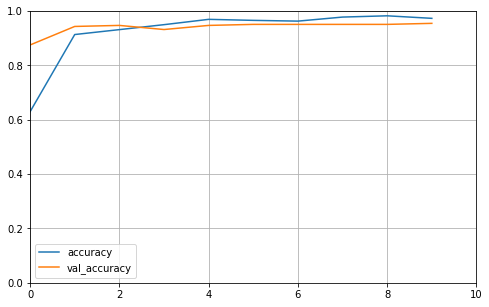

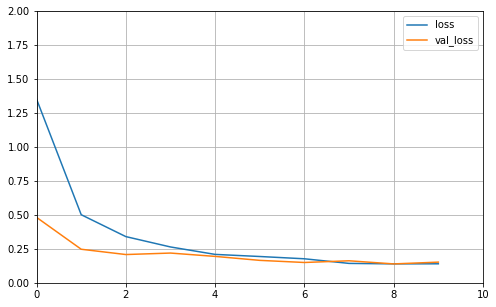

In [19]:
plot_learning_curves(history_resnet_new, 'accuracy', epochs, 0, 1)
plot_learning_curves(history_resnet_new, 'loss', epochs, 0, 2)